<a href="https://colab.research.google.com/github/anandsai410/Blockchain-technologies-Assignment-I/blob/main/ORT_Manual_Global_(data%20-%201704)(FInal_Update).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def is_date(string): #Checks if the date is dd.mm.yyyy or yyyy.mm.dd format
  if ((string[0:4]+string[5:7]+string[8:10]).isdigit()) or ((string[0:2]+string[3:5]+string[6:10]).isdigit()):
    return True
  else:
    return False

def convert_dte(x): #Converts any date in any format to yyyy.mm.dd format
  if (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="/" and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m/%d/%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="." and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m.%d.%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="-" and int(x[0:2])<=12 and int(x[3:5])>12:
    y=datetime.strptime(x, "%m-%d-%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]=="-":
    y=datetime.strptime(x, "%Y-%m-%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="-":
    y=datetime.strptime(x, "%d-%m-%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]==".":
    y=datetime.strptime(x, "%Y.%m.%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]==".":
    y=datetime.strptime(x, "%d.%m.%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:4]+x[5:7]+x[8:10]).isdigit() and x[4]=="/":
    y=datetime.strptime(x, "%Y/%m/%d")
    y=y.strftime("%Y.%m.%d")
    return y
  elif (x[0:2]+x[3:5]+x[6:10]).isdigit() and x[2]=="/":
    y=datetime.strptime(x, "%d/%m/%Y")
    y=y.strftime("%Y.%m.%d")
    return y
  else:
    return ''

def checkdte(x,y): #Used to convert the datre in string format to a datetime object and get the 4 dates before manual ORT date and stores it to an attribute in the data frame.
  if(is_date(x) and is_date(y)):
    om=datetime.strptime(convert_dte(x),"%Y.%m.%d")
    result=[om-timedelta(days=i) for i in range(1, 4)]
    lst=[str(i)[0:10] for i in result]
    for i in lst:
      if y==i or y==x:
        return True

def findfmt(x): # Used to find the dates before the manual ORt date and stores it in formats with different delimiters in the list ["/",".",","," ",":","-"]
  dtes=str(convert_dte(str(x.date()))+","
  +convert_dte(str(x.date()-timedelta(days=1)))+","
  +convert_dte(str(x.date()-timedelta(days=2)))+","
  +convert_dte(str(x.date()-timedelta(days=3))))
  fmtlst=[]
  for i in dtes.split(","):
    dte=i[5:10]
    m=dte[:2]
    d=dte[3:]
    sc=["/",".",","," ",":","-"]
    for j in sc:
      newfmt=m+j+d
      revfmt=d+j+m
      fmtlst.append(newfmt)
      fmtlst.append(revfmt)
  return fmtlst

def checkstr(l1, l2): # used to check if any element after triming the spaces off in l1 is present in l2 or not where l1 and l2 are lists.
    for i in l1:
      i=i.replace(" ","")
      for j in l2:
        j=j.replace(" ","")
        if i in j:
                return True
    return False

def wordfmt(x): # Stores all the format in which the date can be specified in a mixed word-number format into a list
  formatlst=[]
  dtes=dtes=str(str(x.date())+","
  +str(x.date()-timedelta(days=1))+","
  +str(x.date()-timedelta(days=2))+","
  +str(x.date()-timedelta(days=3)))
  for i in dtes.split(','):
    for j in datetowords(i):
      formatlst.append(j)
  return formatlst

def datetowords(date_str):# Used to create all the different word-number mixed format of the words icluding short and long abbreviation of the months.
  rtlst=[]
  year, month, day = map(int, date_str.split('-'))
  month_names = {
      1: "jan", 2: "feb", 3: "mar", 4: "apr",
      5: "may", 6: "june", 7: "july", 8: "aug",
      9: "sep", 10: "oct", 11: "nov", 12: "dec"
  }
  if day<10:
      day_str = f"0{day}"
  else:
      day_str = str(day)
  month_word = month_names[month]
  if day in (1, 21, 31):
      day_suffix = "st"
  elif day in (2, 22):
      day_suffix = "nd"
  elif day in (3, 23):
      day_suffix = "rd"
  else:
      day_suffix = "th"
  format1 = f"{day}{day_suffix}{month_word}"
  format2 = f"{day}{month_word}"
  format3 = f"{month_word}{day}"
  rtlst.append(format1)
  rtlst.append(format2)
  rtlst.append(format3)
  if day<10:
    format4=f"{month_word}{day_str}"
    rtlst.append(format4)
  else:
    pass
  ####
  month_names = {
      1: "january", 2: "february", 3: "march", 4: "april",
      5: "may", 6: "june", 7: "july", 8: "august",
      9: "september", 10: "october", 11: "november", 12: "december"
  }
  if day<10:
      day_str = f"0{day}"
  else:
      day_str = str(day)
  month_word = month_names[month]
  if day in (1, 21, 31):
      day_suffix = "st"
  elif day in (2, 22):
      day_suffix = "nd"
  elif day in (3, 23):
      day_suffix = "rd"
  else:
      day_suffix = "th"
  format1 = f"{day}{day_suffix}{month_word}"
  format2 = f"{day}{month_word}"
  format3 = f"{month_word}{day}"
  rtlst.append(format1)
  rtlst.append(format2)
  rtlst.append(format3)
  if day<10:
    format4=f"{month_word}{day_str}"
    rtlst.append(format4)
  else:
    pass
  return(rtlst)

In [ ]:
import nltk
import datetime
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import punkt
import openpyxl
import pandas as pd
import numpy as np
import re
from datetime import datetime, date, time, timedelta
import time
from dateutil.parser import parser
from dateutil.relativedelta import relativedelta
parser=parser()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install spark-nlp
!pip install pyspark

import sparknlp
from sparknlp.annotator import DocumentAssembler, DateMatcher, MultiDateMatcher
from pyspark.sql.types import StringType
from pyspark.ml import Pipeline

spark = sparknlp.start()
spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6265794831a87ccfc8d5e52be802041508674f7e4df45b8cdd224cc02150020b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
df = pd.read_excel("Global_data_1305_IP.xlsx")
df

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Manager,External Info,ORT manual,Assigned to,Number,State,Priority,Next SLA due date,Next SLA reason,Tags,Updated by,Customer contact
0,Marie Hardiman (I322855),2024-05-13 14:39:54 - System (External Info)\n...,2024-05-14 21:30:00,Aaron Cooke (I565751),CS20240007611652,In progress,2 - High,2024-05-14 21:30:00,ORT (SLA),NaN,I565751,Mudassar Mehmood Z Ali (S0025705227)
1,Marie Hardiman (I322855),2024-05-08 14:48:08 - Aaron Cooke (I565751) (E...,2024-05-15 21:30:00,Aaron Cooke (I565751),CS20240007208716,Awaiting Info,3 - Medium,2024-05-15 21:30:00,ORT (SLA),"#PL_HELP_Tobias, #Q2_2024_Backlog_Tracking",I565751,Iuliana Larion (S0023860671)
2,Marie Hardiman (I322855),2024-05-10 21:45:51 - System (External Info)\n...,2024-05-13 21:30:00,Aaron Cooke (I565751),CS20240007603119,In progress,2 - High,2024-05-13 21:30:00,ORT (SLA),NaN,I565751,Shrinivasa Shenoy (S0025182574)
3,Marie Hardiman (I322855),2024-05-13 14:15:38 - Aaron Cooke (I565751) (E...,2024-05-13 21:30:00,Aaron Cooke (I565751),CS20240007040917,In progress,3 - Medium,2024-05-13 21:30:00,ORT (SLA),"#PFA_90+_Bustathon_2024, #Q2_2024_Backlog_Trac...",I565751,Aline Batista (S0024149298)
4,Sourabh Shah (I033453),2024-05-13 13:43:41 - Abhijith Menon (I554905)...,2024-05-14 14:25:27,Abhijith Menon (I554905),CS20240007602103,In progress,2 - High,2024-05-14 14:25:27,ORT (SLA),NaN,system,Michaela Miskovcikova (S0021838416)
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Liam Hudson (I323795),2024-05-10 02:39:16 - Youssouf Sangare (I31938...,2024-06-01 05:29:55,Youssouf Sangare (I319380),CS20240007264952,In progress,3 - Medium,2024-06-01 05:29:55,ORT (SLA),NaN,system,Sai Anumandla (S0025217721)
501,Liam Hudson (I323795),2024-04-17 06:07:43 - Youssouf Sangare (I31938...,2024-05-01 04:56:57,Youssouf Sangare (I319380),CS20240007163373,In progress,4 - Low,2024-05-01 04:56:57,ORT (SLA),#Q2_2024_Backlog_Tracking,system,Masahiro Shimmen (S0023703484)
502,Liam Hudson (I323795),2024-04-19 08:37:48 - Youssouf Sangare (I31938...,2024-04-30 09:37:34,Youssouf Sangare (I319380),CS20240007432676,In progress,3 - Medium,2024-04-30 09:37:34,ORT (SLA),NaN,S0024667966,Lidia Queralto (S0024667966)
503,Liam Hudson (I323795),2024-05-09 16:44:57 - Youssouf Sangare (I31938...,2024-05-25 17:44:15,Youssouf Sangare (I319380),CS20240007566182,In progress,3 - Medium,2024-05-25 17:44:15,ORT (SLA),'@Not_Release,S0024937455,Bhavani Guttikonda (S0024937455)


In [ ]:
ext_inf=df['External Info']
dte=df['ORT manual']
df['CP_External Information']=''
df['OA_External Information']=''
df['dates_identified']=''
df['ORTM_ok_dates']=''
df['pytag']=''

In [ ]:
#Finding the chat sent by the ORT assistant
pattern_OA = r'\<br/>(.*?)\<br/>'

for i in range(0,len(df)):
  xstr=""
  x = re.findall(pattern_OA, df.iloc[i,1])
  for j in x:
     xstr = xstr+"."+str(j)
  df.iloc[i,13] = xstr

In [ ]:
#Finding the chat sent by the case processor
pattern_SE = r'\>(.*?)\</p>'
for i in range(0,len(df)):
  xstr=""
  x = re.findall(pattern_SE, df.iloc[i,1])
  for j in x:
     xstr = xstr+"."+str(j)
  df.iloc[i,12] = xstr

In [ ]:
# Step 1: Transforms raw texts to `document` annotation
document_assembler = (
    DocumentAssembler()
    .setInputCol("text")
    .setOutputCol("document")
)
# Step 2: Extracts one date information from text
date = (
    DateMatcher()
    .setInputCols("document") \
    .setOutputCol("date") \
    .setOutputFormat("yyyy.MM.dd")
)

pipl = Pipeline(stages=[document_assembler, date])

In [ ]:
for i in range(0,len(df)):
  df.iloc[i,15]=str(convert_dte(str(df.iloc[i,2].date()))+","
  +convert_dte(str(df.iloc[i,2].date()-timedelta(days=1)))+","
  +convert_dte(str(df.iloc[i,2].date()-timedelta(days=2)))+","
  +convert_dte(str(df.iloc[i,2].date()-timedelta(days=3))))#Finding all the dates that should be complying according to the manual ort date

In [ ]:
#Extracting the dates from ORT assistant sent message
for i in range(0,len(df)):
  dtestr=""
  text_oa = sent_tokenize(df.iloc[i,13])
  for j in text_oa:
    for k in word_tokenize(j):
      if is_date(k):
        if len(k)>=9:
          dtestr+=convert_dte(k)+","
  df.iloc[i,14]=(dtestr)

In [ ]:
#Checks the
for i in range(0,len(df)):
  list1=df.iloc[i,14].replace(" ","").split(",")
  list2=df.iloc[i,15].replace(" ","").split(",")
  is_present = any(item in list2 for item in list1)
  if is_present:
    df.iloc[i,16]="ORTMA_OK"
  else:
    pass

In [ ]:
count=0
for i in range(0,len(df)):
    if df.iloc[i,16]=="ORTMA_OK":
      count=count+1
print(count)

61


In [ ]:
for i in range(0,len(df)):
  if df.iloc[i,16]=="ORTMA_OK":
    pass
  else:
    dtestr=""
  #Case Processor part
    text_cp = sent_tokenize(df.iloc[i,12])
    spark_df_cp = spark.createDataFrame(text_cp, StringType()).toDF("text")
    result_cp = pipl.fit(spark_df_cp).transform(spark_df_cp)
    resultdf_cp = result_cp.toPandas()
    for j in resultdf_cp['date']:
      if j != []:
        for k in j:
          dtestr=dtestr+str(k.result)+","

    lst=[k.replace(" ","") for k in dtestr.split(",")]
    lst=list(set(lst))
    dtestr_final=""
    for l in lst:
      if len(l)>5:
        dtestr_final=dtestr_final+l+","
    df.iloc[i,14]=df.iloc[i,14]+dtestr_final
    continue

In [ ]:
df
#CONCLUSION TILL CURRENT STEP:
#Until the above performed steps, The only possible areas of error is:
#1. The date is mentioned in a partial format.
#2. The model is not able to identify the date properly.

#OR else, the case is simply not manual ORT compliant.

,Manager,External Info,ORT manual,Assigned to,Number,State,Priority,Next SLA due date,Next SLA reason,Tags,Updated by,Customer contact,CP_External Information,OA_External Information,dates_identified,ORTM_ok_dates,pytag
0,Marie Hardiman (I322855),2024-05-13 14:39:54 - System (External Info)\n...,2024-05-14 21:30:00,Aaron Cooke (I565751),CS20240007611652,In progress,2 - High,2024-05-14 21:30:00,ORT (SLA),NaN,I565751,Mudassar Mehmood Z Ali (S0025705227),.Hi there.Thank you for contacting Cloud Produ...,.You will receive an update about this inciden...,"2024.05.14,","2024.05.14,2024.05.13,2024.05.12,2024.05.11",ORTMA_OK
1,Marie Hardiman (I322855),2024-05-08 14:48:08 - Aaron Cooke (I565751) (E...,2024-05-15 21:30:00,Aaron Cooke (I565751),CS20240007208716,Awaiting Info,3 - Medium,2024-05-15 21:30:00,ORT (SLA),"#PL_HELP_Tobias, #Q2_2024_Backlog_Tracking",I565751,Iuliana Larion (S0023860671),.Hi Iuliana.I have been advised to raise this ...,,"2024.05.15,1922.01.29,","2024.05.15,2024.05.14,2024.05.13,2024.05.12",
2,Marie Hardiman (I322855),2024-05-10 21:45:51 - System (External Info)\n...,2024-05-13 21:30:00,Aaron Cooke (I565751),CS20240007603119,In progress,2 - High,2024-05-13 21:30:00,ORT (SLA),NaN,I565751,Shrinivasa Shenoy (S0025182574),.Hi there.Thank you for contacting Cloud Produ...,.You will receive an update about this inciden...,"2024.05.13,","2024.05.13,2024.05.12,2024.05.11,2024.05.10",ORTMA_OK
3,Marie Hardiman (I322855),2024-05-13 14:15:38 - Aaron Cooke (I565751) (E...,2024-05-13 21:30:00,Aaron Cooke (I565751),CS20240007040917,In progress,3 - Medium,2024-05-13 21:30:00,ORT (SLA),"#PFA_90+_Bustathon_2024, #Q2_2024_Backlog_Trac...",I565751,Aline Batista (S0024149298),.Hi Aline.Hope you are well and enjoyed time o...,,"1956.01.13,","2024.05.13,2024.05.12,2024.05.11,2024.05.10",
4,Sourabh Shah (I033453),2024-05-13 13:43:41 - Abhijith Menon (I554905)...,2024-05-14 14:25:27,Abhijith Menon (I554905),CS20240007602103,In progress,2 - High,2024-05-14 14:25:27,ORT (SLA),NaN,system,Michaela Miskovcikova (S0021838416),".Hi Michaela,.I have shared the details with t...",.You will receive an update about this inciden...,"2024.05.13,","2024.05.14,2024.05.13,2024.05.12,2024.05.11",ORTMA_OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Liam Hudson (I323795),2024-05-10 02:39:16 - Youssouf Sangare (I31938...,2024-06-01 05:29:55,Youssouf Sangare (I319380),CS20240007264952,In progress,3 - Medium,2024-06-01 05:29:55,ORT (SLA),NaN,system,Sai Anumandla (S0025217721),".Hello Sai,&nbsp;.&nbsp;.Database feedbase: Th...",..,,"2024.06.01,2024.05.31,2024.05.30,2024.05.29",
501,Liam Hudson (I323795),2024-04-17 06:07:43 - Youssouf Sangare (I31938...,2024-05-01 04:56:57,Youssouf Sangare (I319380),CS20240007163373,In progress,4 - Low,2024-05-01 04:56:57,ORT (SLA),#Q2_2024_Backlog_Tracking,system,Masahiro Shimmen (S0023703484),".Hello Yasutaka ,.&nbsp;.we are still working ...",..Contact phone or email: +81-9067493178.,"2024.03.19,","2024.05.01,2024.04.30,2024.04.29,2024.04.28",
502,Liam Hudson (I323795),2024-04-19 08:37:48 - Youssouf Sangare (I31938...,2024-04-30 09:37:34,Youssouf Sangare (I319380),CS20240007432676,In progress,3 - Medium,2024-04-30 09:37:34,ORT (SLA),NaN,S0024667966,Lidia Queralto (S0024667966),.Hello Lidia &nbsp;.&nbsp;.WE are working on y...,..,,"2024.04.30,2024.04.29,2024.04.28,2024.04.27",
503,Liam Hudson (I323795),2024-05-09 16:44:57 - Youssouf Sangare (I31938...,2024-05-25 17:44:15,Youssouf Sangare (I319380),CS20240007566182,In progress,3 - Medium,2024-05-25 17:44:15,ORT (SLA),'@Not_Release,S0024937455,Bhavani Guttikonda (S0024937455),".Hello&nbsp; Bhavani &nbsp;,&nbsp;.&nbsp;.As p...",,,"2024.05.25,2024.05.24,2024.05.23,2024.05.22",


In [ ]:
for i in range(0,len(df)):
  string = df.iloc[i,12]
  words = string.split(" ")
  for j in range(len(words)):
    words[j] = words[j].replace("<sup>", "")
    words[j] = words[j].replace("</sup>", "")
    words[j] = words[j].replace("\xa0", "")
  string = " ".join(words)
  df.iloc[i,12]=string

In [ ]:
for i in range(0,len(df)):
  if df.iloc[i,16]=="ORTMA_OK":
    pass
  else:
    list1=df.iloc[i,14].replace(" ","").split(",")
    list2=df.iloc[i,15].replace(" ","").split(",")
    is_present = any(item in list2 for item in list1)
    if is_present:
      df.iloc[i,16]="ORTM_OK"
    else:
      pass

In [ ]:
for i in range(0,len(df)):
  if df.iloc[i,16]=="":
    fmtlist=findfmt(df.iloc[i,2])
    words=word_tokenize(df.iloc[i,12])
    if checkstr(fmtlist,words):
      df.iloc[i,16]="ORTM_OK_(F)"
    else:
      pass

In [ ]:
#Next step is to find the dates specififed in partial format which has date expressed in words too since
#dates specified like "Aril 17th" will not be identified properly by the DateMatcher function unless the year is mentioned along with the same.

In [ ]:
for i in range(0,len(df)):
  sc=["/",".",","," ",":","-"]
  if df.iloc[i,16]=="":
    slist=[]
    for j in sent_tokenize(df.iloc[i,12]):
      for k in j:
        if k in sc:
          j=j.replace(k,"")
      j=j.replace(" ","")
      j=j.lower()
      slist.append(j)
    dtewlst=wordfmt(df.iloc[i,2])
    if checkstr(dtewlst,slist):
      df.iloc[i,16]="ORTM_OK_(DWF)"
    else:
      pass

In [ ]:
for i in range(0,len(df)):
  if df.iloc[i,16]=="":
    df.iloc[i,16]="ORTM_NOK"
  else:
    pass

In [ ]:
count_oa=0
count_cp=0
count_f=0
count_dwf=0
count_nok=0

for i in range(0,len(df)):
  if df.iloc[i,16]=="ORTMA_OK":
    count_oa+=1
  elif df.iloc[i,16]=="ORTM_OK":
    count_cp+=1
  elif df.iloc[i,16]=="ORTM_OK_(F)":
    count_f+=1
  elif df.iloc[i,16]=="ORTM_OK_(DWF)":
    count_dwf+=1
  elif df.iloc[i,16]=="ORTM_NOK":
    count_nok+=1

print("Count of complying cases where update is given by the ORT assistant=",count_oa)
print("Count of complying cases where update is given by the case processor=",count_cp)
print("Count of complying cases where update is given by case processor in partial format=",count_f)
print("Count of complying cases where update is given by case processor in word format=",count_dwf)
print("Count of non - complying cases =",count_nok)

Count of complying cases where update is given by the ORT assistant= 61
Count of complying cases where update is given by the case processor= 85
Count of complying cases where update is given by case processor in partial format= 33
Count of complying cases where update is given by case processor in word format= 56
Count of non - complying cases = 270


In [ ]:
##ACCURACY INCREASE##
'''
for i in range(0,len(df)):
  if df.iloc[i,16]=="ORTM_OK_(F)" or df.iloc[i,16]=="ORTM_OK_(DWF)":
'''
#####################

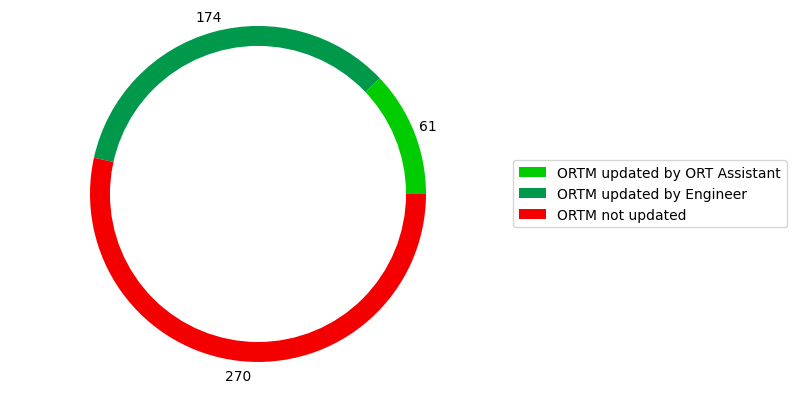

In [ ]:
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image
import io
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

#PIECHART
values=[count_oa, (count_cp+count_f+count_dwf), count_nok]
labels=['ORTM updated by ORT Assistant','ORTM updated by Engineer','ORTM not updated']
colors=['#00cc00','#00994c','#f50000']

total_count=sum(values)
patches, texts, autotexts=plt.pie(values, autopct=lambda p: '{:.0f}'.format(p * total_count / 100),colors=colors, radius=0.8, pctdistance=1.09)

circle = plt.Circle((0, 0), 0.7, color='white', fc='white', lw=1.5)
plt.gca().add_artist(circle)

plt.axis('equal')
plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig('chart.png', bbox_inches='tight')
#WORKBOOK
workbook = Workbook()

#SHEET 1
sheet1 = workbook.active
sheet1.title = "All cases for March"

for row in dataframe_to_rows(df, index=False, header=True):
    sheet1.append(row)

#SHEET 2
sheet2 = workbook.create_sheet(title="Observations")

img_path = "chart.png"
img = Image(img_path)
img.width = 486.16
img.height = 244.72
sheet2.add_image(img,'C4')

workbook.save(filename='ORT Manual Report.xlsx')